# **Lab I : Signaux analogiques**

+ **Cours "Physique du Numérique"** - Portail René Descartes - AMU

Préparé par :

- Jean-Marc Themlin (v. 2021-08-31), Aix-Marseille Université © Contenus à diffusion restreinte, dans le cadre de ce cours.

-------------------------

## I.A : Méthodologie
#### Ce notebook Jupyter tient lieu à la fois d'énoncé et de compte-rendu de votre travail. A chaque TP correspond un notebook, que vous récupérez sur votre ordinateur local à partir des pages AMeTICE du cours. Au fur-et-à-mesure de votre travail, vous effectuez les exercices et remplissez les cellules avec du code suffisamment commenté, et les cellules Markdown (texte formatté) avec vos réponses aux questions, vos commentaires, sans oublier vos conclusions personnelles. A la fin de la séance de TP, pour pouvoir terminer le TP à la maison, vous récupérez votre notebook (d'extension *.ipynb*) soit par courriel, soit sur le nuage, ou sur clé USB. 

#### Pour travailler les notebooks Jupyter sur votre ordinateur, nous vous conseillons d'installer l'environnement de développement [Anaconda](https://www.anaconda.com/), utilisé aussi lors des TP en séance.  

#### Lorsque vous avez terminé le compte-rendu, avant la date limite de remise du travail, vous déposez une copie de votre notebook dans la boîte de dépôt (*dropbox*) dédiée des pages AMeTICE du cours, dans la section qui convient.

-------------------------

## I.B : Python 3 et les notebooks Jupyter
#### On présuppose de votre part une familiarité raisonnable avec l'usage de base du langage Python (version 3), que nous utiliserons généralement dans les cellules de code d'un notebook Jupyter. Si vous n'êtes pas à l'aise avec Python ou souhaitez revoir les principes de la programmation dans ce langage de plus en plus répandu, nous vous recommandons de travailler par vous-mêmes le [cours d'introduction à la programmation en Python](https://www.jdbonjour.ch/cours/python/introduction/) de Jean-daniel Bonjour de l'EPFL, ou un [cours de Python de l'Université Paris Diderot](https://python.sdv.univ-paris-diderot.fr), ou le cours d'introduction à Python 3 pour le calcul scientifique de  [l'université de Montpellier](https://courspython.com/bases-python.html)), ou encore de suivre un des très nombreux tutoriels disponibles sur l'Internet ([celui-ci](https://www.w3schools.com/python/default.asp) par exemple) pour vous remettre en mémoire les éléments de ce langage de programmation, que nous allons utiliser tout au long de ce cours, en particulier des TP. 

##### Sur les pages AMeTICE du cours, vous trouverez une introduction aux notebook Jupyter, ainsi qu'un notebook d'apprentissage aux principales fonctionnalités d'un notebook Jupyter. Nous vous conseillons fortement de les parcourir avant d'avoir effectué ce TP.

------

## I.C : Enoncé du Lab I : Signaux analogiques

##### Outre une prise de contact avec l’environnement de programmation en Python 3 dans un notebook *Jupyter*, l’objectif de ce TP est de vérifier ou d'anticiper les résultats obtenus lors du TD 1. 

#### Remarque importante : Dans un notebook Jupyter, on construit séquentiellement l'environnement (bibliothèques de fonctions importées - exemples : *numpy*, *matplotlib.pyplot*, fonctions et variables définies par l'utilisateur) de programmation, il est important d'exécuter séquentiellement (de haut en bas) les différentes cellules de code. En effet, la cellule N peut utiliser des fonctions ou variables définies dans les cellules précédentes (N-1, N-2,...). Ainsi, la première cellule de code ci-dessous charge notamment les bibliothèques [numpy](https://courspython.com/apprendre-numpy.html) (permet l'usage des tableaux de nombres multi-dimensionnels appelés *arrays ou ndarrays*), et [matplotlib.pyplot](https://zestedesavoir.com/tutoriels/469/introduction-aux-graphiques-en-python-avec-matplotlib-pyplot/) (permet le tracé de graphes). Elle contient également la fonction *delta(t,t0)*, qui retourne une impulsion en $t=t_0$.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets

# Disable warning messages to avoid distracting the beginners
import warnings
warnings.filterwarnings('ignore')    

def delta(t,t0):
    # Use np.arange to generate t in order to insure that t0 is present in t
    dt=t[1]-t[0]
    NN=t.shape
    N=NN[0]
    x=np.zeros(N,dtype=float)
    ind=np.argwhere(abs(t-t0)<dt/2)
    # print(ind)
    indd=ind[0]
    # print(indd)
    x[indd]=1
    return x

## I.D : Signaux & vecteurs : Réalisez votre premier graphe avec Python 3

Pour bien comprendre ce qui suit, nous vous conseillons de recopier (à la main, plutôt qu'un copier/coller afin de mieux mémoriser la syntaxe du langage) et d'exécuter les instructions dans la cellule de code ci-dessous au fur et à mesure de votre progression.

Les signaux unidimensionnels numériques du type x[n] sont généralement représentés à l'aide d'un vecteur ligne ou d'un vecteur colonne. Un vecteur ligne n'est rien d'autre qu'un tableau de nombres ([array](https://www.w3schools.com/python/numpy/numpy_creating_arrays.asp) de l'extension [numpy](https://courspython.com/apprendre-numpy.html)), par exemple x, comprenant une ligne ou une colonne de N nombres séparés par une virgule, que l'on peut définir dans Python en les énumérant entre crochets, comme dans la cellule-code ci-dessous, où l'instruction `plt.stem(x)` permet de visualiser dans un graphe toutes les sept valeurs de ce vecteur-ligne : 

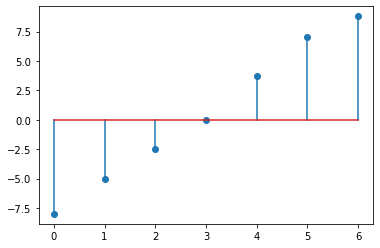

In [3]:
x = np.array([-8,-5,-2.5,0.001,3.75,7,8.8])
plt.stem(x)
plt.show()

où l'échelle des abscisses (horizontale) représente les indices des éléments du vecteur, en commençant par 1 jusqu'à N=7.

Chaque élément du vecteur-ligne x est adressable séparément ; vous pouvez obtenir la valeur des premier et dernier éléments en exécutant dans la ligne de commande les instructions `print(x[0])` et `print(x[-1])`. La longueur du vecteur est obtenue via l'instruction `len(t)`.

### Exercice

Analysez le script Python de la cellule ci-dessous et essayez de prévoir (avant son exécution) ou d'expliquer à posteriori les valeurs affichées :

In [4]:
t = np.arange(-1,1,0.01)
print(len(t),t[0],t[-1])
x = delta(t,0)
print(max(x))
print(np.argwhere(x==max(x)))

200 -1.0 0.9900000000000018
1.0
[[100]]


#### Le vecteur support temporel

La plupart du temps, les indices en abscisse ne sont pas très parlants. Supposons que les sept valeurs du vecteur représentent une quantité évaluée en t=0 et en des temps bien définis ; si l'on veut rendre compte du rythme d'acquisition de ces valeurs, il est pratique de créer un second vecteur, appelé **vecteur-support**, également composé de N=7 éléments, qui contiendra les instants d'échantillonnage, soit :

`t = np.array([0,10,15,30,45,52,60])`

dans la cellule ci-dessous, vous êtes maintenant inviter à visualiser les valeurs de x (en ordonnée) en fonction de celles de t (en abscisse), avec l'instruction stem ou plot :

`plt.stem(t,x)` ou `plt.plot(t,x)`

où la variable en abscisse apparaît en premier. Notez que les deux vecteurs concernés par le stem ou le plot doivent absolument comporter le même nombre d'éléments.

Vous pouvez ensuite ajouter à votre graphe le titre et la description de chaque axe, avec les instructions :

```python
plt.title('Mon premier graphe')
plt.xlabel('temps (minute)')
plt.ylabel('Variable x')
```

L'instruction `plt.grid('on')` superpose un quadrillage à la figure, ce qui permet de mieux se rendre compte des variations relatives de la grandeur x.

L'instruction `plt.show()` est normalement requise pour permettre l'affichage de la figure par Python (généralement superfétatoire dans un notebook Jupyter). 

**Remarque** : Les variables (vecteurs) x et t existent à présent dans l'environnement actuel, qui comprend l'ensemble des variables créées depuis l'ouverture de ce notebook, jusqu'à ce que vous le quittiez, que vous effaciez l'ensemble des variables à l'aide de l'instruction `%reset`, ou que vous effaciez sélectivement une variable particulière à l'aide de l'instruction `del x`, où x est la variable à supprimer de l'environnement. Vous pouvez visualiser toutes les variables de l'environnement avec l'instruction `%whos`, qui liste tous les objets (variables, fonctions, modules...) utilisés dans le notebook).

Félicitations ! Vous venez de réaliser votre premier graphe avec Python, qui doit ressembler à peu de choses près à celui de la figure ci-dessous.

<img src="https://amubox.univ-amu.fr/s/3zrqBq6B7meRkYN/preview" style="zoom:75%;" />

A toutes fins utiles, les instructions nécessaires pour produire ce graphe sont reprises dans le listing ci-dessous. Des paramètres optionnels ont été rajoutés dans les instructions graphiques afin d'obtenir un graphe plus facilement lisible.

```python
x=np.array([-8,-5,-2.5,0.01,3.75,7,8.8])
t=np.array([0,10,15,30,45,52,60])

plt.figure(1)
plt.stem(x)
plt.xlabel('indices des points')
plt.ylabel('valeurs de x')
plt.grid('on')
plt.show()

plt.figure(2)
plt.stem(t,x)
plt.xlabel("instants d'acquisition (min)")
plt.ylabel('valeurs de x')
plt.grid('on')
plt.show()
```

## I.E Représentation des signaux numériques échantillonnés à période $T_e$ constante

#### **Génération rapide du vecteur support**

Les signaux unidimensionnels numériques résultent souvent de l'échantillonnage d'un signal analogique $x(t)$ à l'aide d'un convertisseur Analogique-Digital, qui réalise $x[n]=x(nTe)$ avec une fréquence d'échantillonnage $f_e=\frac{1}{T_e}$ généralement constante pour un signal donné. Heureusement, la génération du vecteur support ne nécessite pas d'écrire explicitement toutes les valeurs de $t_n = n T_e$ ! Deux instructions (`arange`et `linspace`) permettent de générer très simplement la suite des éléments du vecteur-support, régulièrement espacés, qu'on choisira selon la situation initiale :

##### De deux choses l'une : 
- Soit **on connaît le nombre total N d'échantillons du vecteur x**, ou que l'on peut le déterminer à partir de x (accessible via l'instruction `N=np.size(x)`) ainsi que les temps de début et de fin (ton et toff) lors de l'acquisition du vecteur x. Dans ce cas, il est généralement avantageux de générer le vecteur support avec l'instruction `t=np.linspace(ton,toff,N)`.

- Soit **on connaît la période d'échantillonnage Te du vecteur x**, ainsi que les temps de début et de fin (ton et toff) du vecteur x. Dans ce cas, on pourra utiliser l'instruction `t = np.arange(ton,toff,Te)`. Cette instruction génère autant de points que nécessaire, séparés de Te, pour atteindre toff-Te.

#### **Exemple : Représentation d'une portion d'un signal sinusoïdal**

Avant de considérer la transmission des signaux, nous allons les considérer à un endroit donné, donc à une position de coordonnée x fixée, que nous prendrons égale à zéro par commodité. dans le reste de ce TP, nous allons donc considérer comme modèles de signaux les sinusoïdes décrites par l'une des deux expressions analytiques suivantes :

> $ s(t) = A \ \cos (2\pi f_0 t + \phi )$ : Sinusoïde analogique
>
> $ s[n] = s(n \ t_e) = A \ \cos (2\pi f_0 n \ t_e + \phi )$ : Sinusoïde à temps discret (numérique)

où cos(-) désigne la fonction cosinus bien connue de la trigonométrie. Pour définir un signal à temps continu, on utilise généralement une fonction dont la **variable indépendante** est **t, une variable réelle continue qui représente le temps**. 

Une sinusoïde analogique x(t) est une fonction mathématique dans laquelle l'angle (ou l'argument) de la fonction cosinusoïdale est, à son tour, une fonction de la variable t. Puisque nous considérons normalement que le temps augmente uniformément, l'angle de la fonction cosinus augmente également en proportion du temps. Les paramètres A, $f_0$, et ϕ sont des nombres fixes pour un signal cosinus particulier. Plus précisément, A est appelé l'amplitude, $f_0$ la fréquence, et ϕ la phase du signal (co)sinusoïdal. Il en va de même pour une sinusoïde à temps discret, qui se compose d'échantillons d'une sinusoïde analogique pris tous les multiples entiers de la période d'échantillonnage $t_e$. 

La figure ci-dessous montre le tracé (la trajectoire) (sur l'intervalle temporel [0,20 ms]) de la sinusoïde à temps continu
$x(t) = 10 \cos(2\pi 440\ t - 0.4\pi)$, 
où $A = 10$, $f_0 = 440 Hz$, et $\phi = -0.4π$. 

![](https://raw.githubusercontent.com/Pango01/Signal00/main/SinusSimple.png)

Notez que x(t) oscille entre A et -A, et répète le même modèle d'oscillations tous les 1/440 = 0,00227 s (approximativement). Cet intervalle de temps est appelé la période de la sinusoïde. 


#### **Exercice**

Dans la cellule de code ci-dessous, représentez sur l'intervalle $[-3 s , 5 s]$ le signal à temps continu sinusoïdal défini par $x(t)=3 cos(2\pi 0.5 t)$, où $A=3$, $f_0=0.5Hz$. On utilise pour cela une sinusoïde à temps discret, qui se compose d'échantillons de la sinusoïde à temps continu $x(t)$ pris tous les multiples entiers de la période d'échantillonnage $t_e$. On commence donc par définir un vecteur support temporel comprenant N éléments.

On choisira N suffisamment grand pour représenter le signal continu avec suffisamment de détails, c'est-à-dire avec suffisamment de points par période de la sinusoïde, qui ici vaut $T_0=\frac{1}{f_0}=2 s$. La section du signal représentée dans le graphe, égale à la durée de la section représentée divisée par la période, sera donc ici de $\frac{5-(-3)}{2}=4$ périodes ; en choisissant 32 points par période, on pourra fixer $N=4 \ 32 = 128$ points. Le vecteur support temporel désigné par la variable t est donc créé avec l'instruction `t=np.linspace(-3,5,128)`.

On crée ensuite la variable x à partir du vecteur support t, dont les dimensions seront automatiquement reproduites (on dit que *x hérite* des caractéristiques de *t*), par l'instruction `x = 3*np.cos(2*np.pi*0.5*t)`.

Le tracé de la section du signal continu x(t) sur l'intervalle $[-3 ;5]$ s'obtient simplement par l'instruction `np.plot(t,x)`.

## I.F Usage des sinusoïdes discrètes pour représenter les sinusoïdes à temps continu

Les sinusoïdes (pseudo-)analogiques qui apparaissent dans le graphe ci-dessus sont en réalité des sinusoïdes à temps discret, avec une fréquence d'échantillonnage suffisamment élevée pour qu'elles apparaissent à l'écran comme continues lorsqu'on relie leurs échantillons adjacents par des segments de droite (c'est ce que fait l'instruction `plt.plot(t,x)`). 

1. Pour faire apparaître les échantillons de la sinusoïde, remplacez l'instruction `plt.plot(t,x)` par `plt.plot(t,x,'.')`. 

2. Pour superposer la sinusoïde à temps discret avec la sinusoïde analogique qu'elle réprésente, utilisez l'instruction `plt.plot(t,x,'.',t,x)`. 

3. Pour afficher la sinusoïde à temps discret en fonction de l'indice des échantillons, utilisez l'instruction `plt.plot(x,'.')`.

2. Transformez le programme ci-dessus pour afficher la sinusoïde avec un axe des abscisses (l'axe horizontal) gradué en ms. Il vous faudra également remplacer l'instruction `plt.xlabel('temps (ms)')` par `plt.xlabel('Indice échantillon')`. 

La simulation de la cellule ci-dessous utilise une case à cocher pour afficher la sinusoïde soit uniquement sous son aspect analogique, en fonction du temps, soit son véritable aspect, numérique, en fonction du numéro d'indice, superposée à la sinusoïde analogique qu'elle représente. Cet exemple vous montre comment vous pouvez ajouter dans vos scripts Python des éléments interactifs (des objets html) comme une case à cocher, à l'aide de la bibliothèque [ìpwidgets](https://www.tutorialspoint.com/jupyter/jupyter_notebook_ipywidgets.htm) de Jupyter. 

In [6]:
#  Définition des paramètres de la sinusoïde
A=10
f0=440
phi=-0.4*np.pi

#  définition des autres paramètres
T0=0.02
fe=10*f0   #  fréquence d'échantillonnage conforme au critère de Nyquist
te=1/fe

#  Définition du vecteur support temporel
t=np.arange(0,T0,1/fe)

#  Calcul des valeurs prises par la sinusoïde
x=A*np.cos(2*np.pi*f0*t+phi)

#  Construction de la figure
def f(num):
    if num:
        plt.plot(x,'.r')
        plt.plot(x,'b')
        plt.xlabel('Index number')  
    else:
        plt.plot(t,x,'b')
        plt.xlabel('temps (ms)')
        
    plt.title('Sinusoide')
    plt.show()

numW=widgets.Checkbox(value=False,description="Show samples")
widgets.interact(f,num=numW)

interactive(children=(Checkbox(value=False, description='Show samples'), Output()), _dom_classes=('widget-inte…

<function __main__.f(num)>

## I.G : Exercices

##### **Remarque importante** : Vous n'aurez probablement pas le temps d'effectuer l'ensemble de ces exercices lors de la séance de TP en présentiel. Nous vous conseillons pourtant vivement d'essayer de les résoudre par vous-même, car ils sont très instructifs, et qu'ils inspireront certainement les questions de l'examen de TP terminal.

### Exercice I.0

1. Dans la cellule de code ci-dessous, écrivez une fonction Python `mycos(A,f,phi,t)`qui calcule et retourne les valeurs d’une cosinusoïde discrète d’expression analytique $x(t)=A \ \cos (2\pi f_0t+\phi)$ à partir des trois paramètres  $(A,f_0,\phi)$ et d’un vecteur support temporel $t$ défini comme un *[array](https://www.w3schools.com/python/numpy/numpy_creating_arrays.asp)*. Ces quatre variables seront fournies en paramètre de la fonction.


2. Dans la cellule ci-dessous, écrivez une fonction Python qui calcule et retourne les valeurs de la fonction rectangulaire normalisée $rect(t)$ à partir d’un vecteur support temporel $t$ défini comme un *[array](https://www.w3schools.com/python/numpy/numpy_creating_arrays.asp)*. 


### Exercice I.1

#### Aux TD

1. Déterminez les paramètres $(A,f_0,\phi)$ du signal cosinusoïdal $x(t)$ représenté ci-dessous. 

   <img src="https://amubox.univ-amu.fr/s/nmRzJEDL3wFWaqS/preview" style="zoom:75%;" />

2. Tracez schématiquement le spectre unilatéral (module et phase) de ce signal cosinusoïdal. 

#### Aux TP

dans la cellule de code ci-dessous, écrivez un script Python pour reproduire le graphe du signal d'après l'expression analytique déterminée plus haut sur l'intervalle $[-15ms,20ms]$, et vérifiez que la sinusoïde tracée ainsi correspond bien à celle de la figure ci-dessus. 

### Exercice I.2

#### Aux TD

Représentez dans un graphe le signal x(t) décrit par l'expression analytique $x(t)=(2-2t)rect(\frac{t}{2})$.
A partir du graphe, déterminez la valeur de $x(0)$ ainsi que l'aire sous la courbe. 
Retrouvez ces résultats à partir de l'expression analytique de $x(t)$ et d'une intégrale définie (pour l'aire).

#### Aux TP

Ecrivez un script Python pour reproduire le graphe de $x(t)$ d'après son expression analytique sur l'intervalle qui convient, et calculez numériquement $x(0)$ ainsi que l’aire sous la courbe. 

### Exercice I.3

#### Aux TD

Représentez le signal $x(t)$ décrit par l'expression analytique suivante : $x(t)=2 rect(2(t-2))$.
A partir du graphe, déterminez la valeur de $x(0)$ ainsi que l'aire sous la courbe. 
Retrouvez ces résultats à partir de l'expression analytique et d'une intégrale définie (pour l'aire).

**Indication** : Pour tracer le signal en réduisant le risque d'erreurs, on aura intérêt à transformer l'expression de $x(t)$ sous la forme normalisée $x(t)=A \ rect \left( \frac{t-t_0}{T} \right)$​.

#### Aux TP

Ecrivez un script Python pour reproduire le graphe de $x(t)$ d'après son expression analytique sur l'intervalle qui convient, et calculez numériquement $x(0)$ ainsi que l’aire sous la courbe. 

### Exercice I.4

#### Aux TD

On retarde de 2 secondes le signal $x(t)= rect\left( \frac{t}{2}\right)$ pour obtenir un nouveau signal $y(t)$.

- Le signal retardé est-il décalé vers la gauche ou vers la droite ? 
- Sur quelle valeur de $t$ le signal $y(t)$ est-il centré ?
- Représentez ces deux signaux sur un graphe. 
- Donnez l'expression analytique du signal retardé en fonction de $x(t)$.

#### Aux TP

Ecrivez un script Python pour reproduire les graphes de $x(t)$ et $y(t)$ d'après leur expression analytique sur l'intervalle qui convient. 

### Exercice I.5

#### Aux TD

Donnez l'expression analytique du signal $y(t)$ dont le graphe est donné dans la figure ci-dessous : 

1. en fonction du signal $x(t)$,
2. en fonction du signal $rect(t)$.

<img src="https://amubox.univ-amu.fr/s/fgo4FnsnqoXQJ6d/preview" style="zoom:100%;" />

#### Aux TP

Dans la cellule ci-dessous, écrivez un script Python pour reproduire les graphes de $x(t)$ et $y(t)$ d'après leur expression analytique sur l'intervalle qui convient. 

### Exercice I.6

#### Aux TD

Ecrivez l'expression analytique du signal x(t) représenté ci-dessous en termes du signal $rect(t)$, de deux manières différentes.

<img src="https://amubox.univ-amu.fr/s/9W7NeHgG6BjF5fH/preview" style="zoom:100%;" />

#### Aux TP

Dans la cellule ci-dessous, en prenant $T_0=5$ et $b=3$, écrivez un script Python pour vérifier l’expression analytique obtenue et reproduire la figure ci-dessus. 

### Exercice I.7

#### Aux TD

Ecrivez l'expression analytique des six signaux $s_n(t)$ représenté ci-dessous en termes du signal $rect(t)$.

<img src="https://amubox.univ-amu.fr/s/2eyzYfiqXjq7Wma/preview" style="zoom:50%;" />

#### Aux TP

Dans la cellule ci-dessous, écrivez un script Python pour reproduire sur l'intervalle $[-4,4]$ les graphes de ces six signaux $s_n(t)$ d’après l’expression analytique obtenue.  

### Exercice I.8

#### Aux TD

Ecrivez l'expression du signal $x(t)=rect(t/2)$ en termes du signal "échelon-unité" $u(t)$.

#### Aux TP

Vérifiez cette expression en écrivant un script Python pour reproduire le graphe de $x(t)$.

### Exercice I.9

#### Aux TD

Ecrivez les 5 signaux ci-dessous sous la forme générique d'une cosinusoïde $x(t)=A\ \cos(2\pi f_0 t + \phi)$, en précisant dans chaque cas la valeur des paramètres $(A,f_0,\phi)$. 

1. $a(t)=2 \sin (\pi t)$
2. $b(t)= 3 \cos (2t)$
3. $c(t)=10 \sin(2\pi t+\pi/4)$
4. $d(t)= \cos (\pi t + \pi /2)$
5. $e(t)= 5 \sin (\pi (t-1))$
6. $f(t)= \sin(-t+1)$

**Indication** : On rappelle que le signal $\sin(t)$ est une cosinusoïde retardée de $\frac{\pi}{2}$, *i.e.* $\sin (t) = \cos (t-\frac{\pi}{2})$.  

#### Aux TP

Utilisez Python dans la cellule de code ci-dessous pour générer le graphe de chacun de ces six signaux sinusoïdaux sur l'intervalle $[-5,5]$​ en vérifiant l'égalité entre les deux expressions de chaque signal. 

### Exercice I.10

#### Aux TD

1. Un signal analogique sous forme d'une tension électrique $e(t)$ est amenée à l'entrée d'un amplificateur. Elle en resort sans distorsion après un délais de $1 ms$, amplifiée d'un facteur 10. Ecrivez l'expression analytique du signal de sortie $s_1(t)$ en fonction de $e(t)$. 

2. Un signal analogique sous forme d'une tension électrique $v(t)$ est une cosinusoïde d'amplitude $5V$ et de fréquence $2 kHz$ (on qualifie cette tension *d'alternative*). Le signal voyage à travers un réseau de communication et en émerge après $100\mu s$ sans distorsion notable, bien qu'avec une amplitude atténuée d'un facteur 3. Ecrivez l'expression analytique du signal de sortie $s_2(t)$ en fonction de $v(t)$. 

3. Calculez le déphasage $\phi$ (en radians) du signal de sortie $s_2(t)$ par rapport au signal d'entrée $v(t)$. 


#### Aux TP

Dans la cellule ci-dessous, tracez à l'aide de Python le graphe des signaux d'entrée et de sortie $v(t)$ et $s_2(t)$, et vérifiez graphiquement la valeur du déphasage. 

### Exercice I.11

#### Aux TD

On considère les signaux $a(t)$, $b(t)$, $c(t)$ et $d(t)$ représentés ci-dessous.

<img src="https://amubox.univ-amu.fr/s/jnt43r2i5s2FEr9/preview" style="zoom:50%;" />

1. Exprimez $c(t)$ en termes de $a(t)$ et $b(t)$.
2. Exprimez $d(t)$ en termes de $a(t)$ et $b(t)$.
3. Pour chacun des quatre signaux, donnez une expression analytique composée d'un signal $rect(t)$ et/ou une cosinusoïde $A \ \cos (2 \pi f_0 t + \phi)$. 

#### Aux TP

A l’aide de Python, dans la cellule-code ci-dessous, vérifiez la validité des expressions trouvées en (3) en traçant le graphe des quatre signaux à partir de leur expression analytique. Vérifiez que la figure obtenue est semblable à la figure ci-dessus.  

### Exercice I.12

#### Aux TD

Un système de traitement des signaux produit un signal de sortie $s(t)$ égal au signal d'entrée $e(t)$ amplifié d'un facteur 4 et retardé de 1 seconde, affecté d'un double écho constitué d'une première réplique du signal d'entrée décalée de 2s par rapport à celui-ci, et d'une seconde réplique décalée de 4s. En supposant que le signal d'entrée est $e(t)=rect \left( \frac{t}{4} \right)$, donnez l'expression analytique du signal de sortie $s(t)$ en fonction du signal d'entrée $e(t)$.

#### Aux TP 

A l’aide de Python, dans la cellule ci-dessous, représentez ces deux signaux. 

------

## I.H. Conclusions personnelles

Indiquez ci-dessous le temps approximatif que vous passé à travailler ce TP en-dehors de la séance.

> Votre réponse ici :

Ecrivez ci-dessous, en guise de conclusions, quelques phrases décrivant ce que ce TP vous a appris.

> **Conclusions personnelles** (votre réponse ici) :
------
------